# Tuesday AM Session
## Plotting, Lists Loops & Functions

In the first sessions on python we introduced some of the basics of using python. Data types, simple math, and then how to import and do some work on more complex word on data through pandas. Today we will take it a step further, looking at how to plot our data, then how to speed our work through loops like Hannah showed us in bash, and then writing functions. Lastly as time per mits we will look at variable scope to learn better what to do if there is an error, conditionals and wat style one should use while use python

As one note, this notebook assumes:
 - that we have made a folder on our desktop "~/Desktop/tuesday_python"
 - in that folder we have folder name "data" that was extracted extracted from the "python-novice-gapminder-data.zip"
 - we have created our jupyter notebook file in the "~/Desktop/tuesday_python" directory
 
As folks with Windows discovered, the home variable "~/" doesn't work, however you don't have to give the full path, you can just give the relative path. If you can give the path relative to the folder in which your jupyter notebook file is saved and running!

-------------------------------------------

### 1. Plotting

There are many packages available that lets one make plots and figures in python. One popularone is [Plot.ly](https://plot.ly) which also has a way to make plots online. by far the most popular package however is the **matplotlib**, for those aware of matlab, this package was originally designed to duplicate much of matlab's functionality. Now it can do much more. We will use matplotlib today, because it is VERY easy to get plotting! We will be using the module "pyplot" within matplotlib

First a few setup functions

In [1]:
#this tells jupyter notebook that we want the images we make to
%matplotlib inline  
#now we actually need import the pyplot module
import matplotlib.pyplot as plt

#add this when you get to section 1.2
import pandas

import numpy as np

import glob

#### 1.1 Now for you first plot! 

Lets make some data

In [2]:
# how about some x data
x = [1,2,3,4,5]
y = [2,4,6,8,10]

#these are both examples of lists, we will talk about them more later
#be aware that plt.plot() expects something which is list like! 
#arguments are the data, must have one x and atleast one y of the same length
#keywards to many things, primarily related to formating.
#like color ans style of the line

To plot we will use plt.plot() funtion. Lets use "help()" to learn a bit about it

In [ ]:
help(plt.plot)
#functions have arguments "args" and keywords "kwargs".
#Arguments are required by the function while keywords are optional

Now to plot, and we will also label the axis

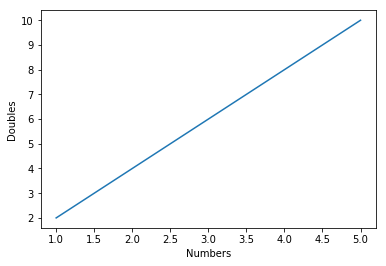

In [4]:
plt.plot(x,y)
plt.xlabel('Numbers')
plt.ylabel('Doubles')

#### 1.2 Plot with real data
This is cool, but how about with some real data? Lets load in our pceanaia data again and set the indext to the "country" column. Go ahead and do this. Put your card to green when you are done 

In [84]:
filename='./data/gapminder_gdp_oceania.csv'
data = pandas.read_csv(filename,index_col='country')

Now lets plot the data for Australia

In [6]:
y = data.ix['Australia']
x = data.columns


In [ ]:
plt.plot(x,y)

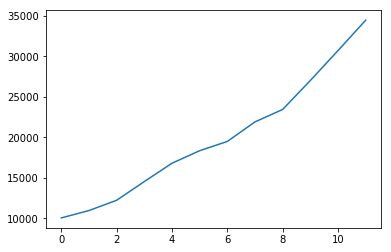

In [8]:
x = range(len(y)) #creates a list from 0 to one minus the number of
#values in our y data
plt.plot(x,y)

([<matplotlib.axis.XTick at 0x7f860f6cc6d8>,
 <a list of 12 Text xticklabel objects>)

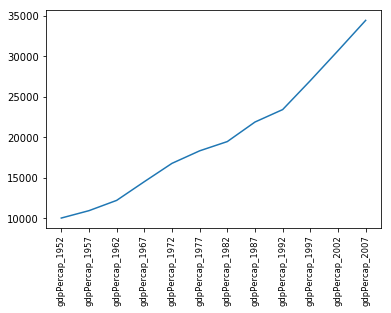

In [9]:
x_tickmarks = data.columns
plt.plot(x,y)
plt.xticks(x,x_tickmarks,size='small',rotation=90)

The pandas DataFrames however, have some nice features to let us plot the x and y values directly

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

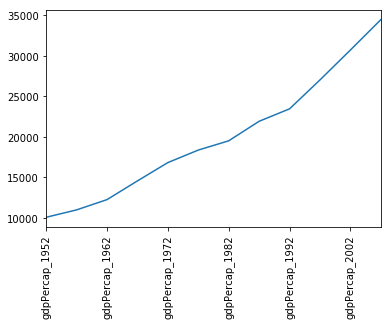

In [10]:
#slice the data file to get just the data for australia, 
# and then plake a plot. By default DataFrame.plot() treats the rows as
# the x axis. Or the values in the first column are the x values
# values in the 2nd column are the y values
data.ix['Australia'].plot() 
plt.xticks(rotation=90)

Lets look at our dataframe again to just see that it plotted as we expected

In [11]:
data.ix['Australia']

gdpPercap_1952    10039.59564
gdpPercap_1957    10949.64959
gdpPercap_1962    12217.22686
gdpPercap_1967    14526.12465
gdpPercap_1972    16788.62948
gdpPercap_1977    18334.19751
gdpPercap_1982    19477.00928
gdpPercap_1987    21888.88903
gdpPercap_1992    23424.76683
gdpPercap_1997    26997.93657
gdpPercap_2002    30687.75473
gdpPercap_2007    34435.36744
Name: Australia, dtype: float64

Why did we use

    plt.xticks(rotation=90)
    
Try plotting without

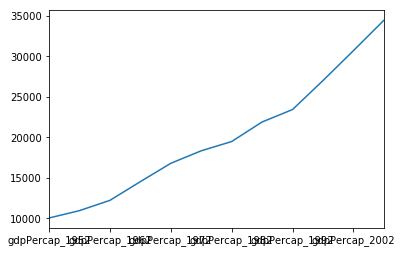

In [12]:
data.ix['Australia'].plot()

If we transpose the data (flip what is on the x axis, we can plot another series on our figure). In other words we can plot both the Australia and New Zealand Data

In [13]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [14]:
data.T 

#ahah transposing it now gives the first column as our x-values, 
# but there are two columns after it, so to sets of y-values!

country,Australia,New Zealand
gdpPercap_1952,10039.59564,10556.57566
gdpPercap_1957,10949.64959,12247.39532
gdpPercap_1962,12217.22686,13175.67800
gdpPercap_1967,14526.12465,14463.91893
gdpPercap_1972,16788.62948,16046.03728
gdpPercap_1977,18334.19751,16233.71770
gdpPercap_1982,19477.00928,17632.41040
gdpPercap_1987,21888.88903,19007.19129
gdpPercap_1992,23424.76683,18363.32494
gdpPercap_1997,26997.93657,21050.41377


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

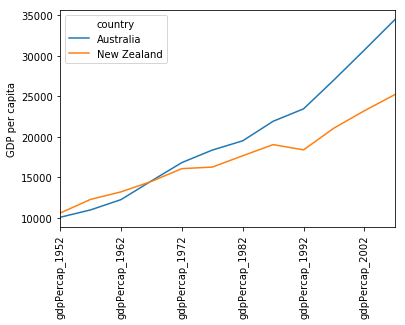

In [15]:
data.T.plot()
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)

#### 1.3 Lets Get Fancy!

let make a bar plot we will first load a new style of plot called "ggplot", this is a style to emulate a popular plotting package in R.

Not sure what this is, or looking for a specific style of plot? Go to [www.matplotlib.org](www.matplotlib.org) and search "ggplot" also look at the gallery

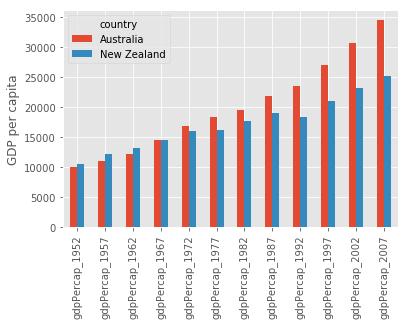

In [16]:
#import a different style and plot our data
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('GDP per capita')

Sweet! But what if we want to have nice labels, aka just the years extracted from the last four characters from to do this we need to learn a bit about loops and lists! 

------------------------------

### 2. List

DO THIS BEFORE THE FIRST SECTION!!!

You've delt with similar things in our bash tutorial, i.e. there were several files in directory. Now in python we might have several or a hundred "variables" perhaps each of these variables corresponds to a data file you have read in. Now you want to do calculations on each of them. 

- Doing calculations with a hundred variables called pressure_001, pressure_002, etc., would be at least as slow as doing them by hand.
- Use a *list* to store many values together.
     - a list is a collection of things
     - Contained within square brackets [...].
     - Values separated by commas ,.
- Use len to find out how many values are in a list.
-

In [17]:
pressures = [0.273, 0.275, 0.277, 0.275, 0.276]
print('pressures:', pressures)

pressures: [0.273, 0.275, 0.277, 0.275, 0.276]


In [18]:
print('length:', len(pressures))

length: 5


#### 2.1 Indexing a List to Fetch an item

this is just like we might do to pull a character from a string

In [19]:
print('zeroth item of pressures:', pressures[0])
print('fourth item of pressures:', pressures[4])

zeroth item of pressures: 0.273
fourth item of pressures: 0.276


#### 2.2 Replacing values by assigning them

Use the index expression to replace the left most or "0" pressure

In [20]:
print('zeroth item of pressures:', pressures[0])


zeroth item of pressures: 0.273


In [21]:
print('fourth item of pressures:', pressures[4])

fourth item of pressures: 0.276


If you want to select multiple values use :

In [22]:
print('1st through 3rd item of pressures:', pressures[0:3])

1st through 3rd item of pressures: [0.273, 0.275, 0.277]


In [23]:
pressures[1:-2]

[0.275, 0.277]

#### 2.3 Lengthing a list with *append*

Use list_name.append to add items to the end of a list

In [24]:
primes = [2, 3, 5]
print('primes is initially:', primes)


primes is initially: [2, 3, 5]


In [25]:
primes.append(7)
primes.append(9)
print('primes has become:', primes)

primes has become: [2, 3, 5, 7, 9]


- append is a method of lists.
    - Like a function, but tied to a particular object.
- Use object_name.method_name to call methods.
    - Deliberately resembles the way we refer to things in a library.
- We will meet other methods of lists as we go along.
    - Use help(list) for a preview.

In [ ]:
help(list)

#### 2.4 deleting items in a list
del list_name[index] removes an item from a list and shortens the list.

Not a function or a method, but a statement in the language.

In [27]:
print('primes before removing last item:', primes)

primes before removing last item: [2, 3, 5, 7, 9]


In [28]:
del primes[4]
print('primes after removing last item:', primes)

primes after removing last item: [2, 3, 5, 7]


#### 2.5 an empty list
- Use [] on its own to represent a list that doesn’t contain any values.
    - “The zero of lists.”
- Helpful as a starting point for collecting values (which we will see in a little bit later).



#### 2.6 List May Contain values of different types

A single list may contain numbers, strings, and anything else.

In [29]:
goals = [1, 'Create lists.', 2, 'Extract items from lists.', 
         3, 'Modify lists.']

print(goals)

[1, 'Create lists.', 2, 'Extract items from lists.', 3, 'Modify lists.']


#### 3.7 Character Strings Can be indexed like lists!

Get single characters from a character string using indexes in square brackets. You have already done this!

Character strings are also a collection, a collection of strings! That just happen to have meaning to us humans.

In [30]:
element = 'carbon'
print('zeroth character:', element[0])

zeroth character: c


In [31]:
print('third character:', element[3])

third character: b


what if we index a value beyond the end of the collection?

In [32]:
print('99th element of element is:', element[99])

IndexError: string index out of range

What if we want to captilize the C in carbon?

In [33]:
element[0] = 'C'

TypeError: 'str' object does not support item assignment

- Cannot change the characters in a string after it has been created.
    - *Immutable:* cannot be changed after creation.
    - In contrast, lists are mutable: they can be modified in place.
- Python considers the string to be a single value with parts, not a collection of values.

#### Practice

Fill in the blanks so that the program below produces the output shown.

    values = ____
    values.____(1)
    values.____(3)
    values.____(5)
    print('first time:', values)
    values = values[____]
    print('second time:', values)

In [34]:
values = []
values.append(1)
values.append(3)
values.append(5)
print('first time:', values)
values = values[1:]
print('second time:', values)

first time: [1, 3, 5]
second time: [3, 5]


------------------------

### 3. Loops

A for loop executes commands once for each value in a collection.
Doing calculations on the values in a list one by one is as painful as working with pressure_001, pressure_002, etc.
A for loop tells Python to execute some statements once for each value in a list, a character string, or some other collection.
“for each thing in this group, do these operations”

In [35]:
for number in [2, 3, 5]:
    print(number)

2
3
5


This for loop is equivalent to:

In [36]:
print(2)
print(3)
print(5)

2
3
5


The first line of the for loop must end with a colon, and the body must be indented.
The colon at the end of the first line signals the start of a block of statements.
Python uses indentation rather than {} or begin/end to show nesting.
Any consistent indentation is legal, but almost everyone uses four spaces.

In [37]:
for number in [2, 3, 5]:
print(number)

IndentationError: expected an indented block (<ipython-input-37-d93aa9ee6533>, line 2)

Indentation is always meaningful in Python.


In [38]:
firstName="Jon"
  lastName="Smith"

IndentationError: unexpected indent (<ipython-input-38-f65f2962bf9c>, line 2)

This error can be fixed by removing the extra spaces at the beginning of the second line.

A for loop is made up of a collection, a loop variable, and a body.

In [39]:
for number in [2, 3, 5]:
    print(number)

2
3
5


The collection, [2, 3, 5], is what the loop is being run on.
The body, print(number), specifies what to do for each value in the collection.
The loop variable, number, is what changes for each iteration of the loop.
The “current thing”.

Loop variables can be called anything.
As with all variables, loop variables are:
Created on demand.
Meaningless: their names can be anything at all.


In [40]:
for kitten in [2, 3, 5]:
    print(kitten)

2
3
5


The body of a loop can contain many statements.
But no loop should be more than a few lines long.
Hard for human beings to keep larger chunks of code in mind.

In [41]:
primes = [2, 3, 5]
for p in primes:
    squared = p ** 2
    cubed = p ** 3
    print(p, squared, cubed)

2 4 8
3 9 27
5 25 125


Use range to iterate over a sequence of numbers.
The built-in function range produces a sequence of numbers.
Not a list: the numbers are produced on demand to make looping over large ranges more efficient.
range(N) is the numbers 0..N-1
Exactly the legal indices of a list or character string of length N

In [42]:
print('a range is not a list: range(0, 3)')
for number in range(0,3):
    print(number)

a range is not a list: range(0, 3)
0
1
2


The Accumulator pattern turns many values into one.
A common pattern in programs is to:
Initialize an accumulator variable to zero, the empty string, or the empty list.
Update the variable with values from a collection.

In [43]:
# Sum the first 10 integers.
total = 0
for number in range(10):
   total = total + (number + 1)
print(total)

55


Read total = total + (number + 1) as:
Add 1 to the current value of the loop variable number.
Add that to the current value of the accumulator variable total.
Assign that to total, replacing the current value.
We have to add number + 1 because range produces 0..9, not 1..10.


#### Practice

Fill in the blanks in each of the programs below to produce the indicated result.

    # Total length of the strings in the list: ["red", "green", "blue"] => 12
    total = 0
    for word in ["red", "green", "blue"]:
        ____ = ____ + len(word)
    print(total)
    
----------

    # List of word lengths: ["red", "green", "blue"] => [3, 5, 4]
    lengths = ____
    for word in ["red", "green", "blue"]:
        lengths = lengths.____(____)
    print(lengths)

---------

    # Concatenate all words: ["red", "green", "blue"] => "redgreenblue"
    words = ["red", "green", "blue"]
    result = ____
    for ____ in ____:
        ____
    print(result)

----------------
    # Create acronym: ["red", "green", "blue"] => "RGB"
    # write the whole thing

#### 3. Looping over data sets

DO THIS AFTER THE MORE PLOTTING

Use a for loop to process files given a list of their names.
A filename is just a character string.
And lists can contain character strings.

In [44]:
for filename in ['data/gapminder_gdp_africa.csv', 'data/gapminder_gdp_asia.csv']:
    data = pandas.read_csv(filename, index_col='country')
    print(filename, data.min())

data/gapminder_gdp_africa.csv gdpPercap_1952    298.846212
gdpPercap_1957    335.997115
gdpPercap_1962    355.203227
gdpPercap_1967    412.977514
gdpPercap_1972    464.099504
gdpPercap_1977    502.319733
gdpPercap_1982    462.211415
gdpPercap_1987    389.876185
gdpPercap_1992    410.896824
gdpPercap_1997    312.188423
gdpPercap_2002    241.165877
gdpPercap_2007    277.551859
dtype: float64
data/gapminder_gdp_asia.csv gdpPercap_1952    331.0
gdpPercap_1957    350.0
gdpPercap_1962    388.0
gdpPercap_1967    349.0
gdpPercap_1972    357.0
gdpPercap_1977    371.0
gdpPercap_1982    424.0
gdpPercap_1987    385.0
gdpPercap_1992    347.0
gdpPercap_1997    415.0
gdpPercap_2002    611.0
gdpPercap_2007    944.0
dtype: float64


Use glob.glob to find sets of files whose names match a pattern.
In Unix, the term “globbing” means “matching a set of files with a pattern”.
The most common patterns are:
* meaning “match zero or more characters”
? meaning “match exactly one character”
Provided in Python by the glob library, which provides a function also called glob.
E.g., glob.glob('*.txt') matches all files in the current directory whose names end with .txt.
Result is a (possibly empty) list of character strings.


In [45]:
import glob
print('all csv files in data directory:', glob.glob('data/*.csv'))

all csv files in data directory: ['data/gapminder_gdp_oceania.csv', 'data/gapminder_all.csv', 'data/gapminder_gdp_europe.csv', 'data/gapminder_gdp_africa.csv', 'data/gapminder_gdp_americas.csv', 'data/gapminder_gdp_asia.csv']


In [46]:
print('all PDB files:', glob.glob('*.pdb'))

all PDB files: []


Use glob and for to process batches of files.
Helps a lot if the files are named and stored systematically and consistently so that simple patterns will find the right data.

In [47]:
for filename in glob.glob('data/*.csv'):
    data = pandas.read_csv(filename)
    print(filename, data['gdpPercap_1952'].min())

data/gapminder_gdp_oceania.csv 10039.59564
data/gapminder_all.csv 298.8462121
data/gapminder_gdp_europe.csv 973.5331948
data/gapminder_gdp_africa.csv 298.8462121
data/gapminder_gdp_americas.csv 1397.717137
data/gapminder_gdp_asia.csv 331.0


This includes all data, as well as per-region data.
Use a more specific pattern in the exercises to exclude the whole data set.
But note that the minimum of the entire data set is also the minimum of one of the data sets, which is a nice check on correctness.

Write a program that reads in the regional data sets and plots the average GDP per capita for each region over time in a single chart.

In [1]:
data_all_regions = []
data_file_names = []
for filename in glob.glob('data/gapminder_gdp*.csv'):
    data_file_names.append(filename[5:])
    data_all_regions.append(pandas.read_csv(filename))
    print(filename)

print(len(data_all_regions))
print(data_file_names)


NameError: name 'glob' is not defined

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

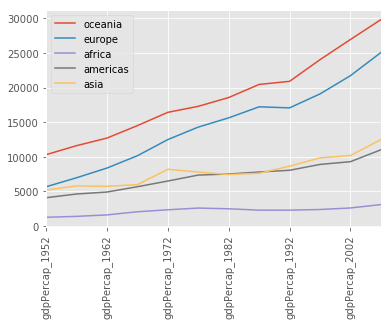

In [49]:
i = 0
for region in data_all_regions:
    region.describe().ix['mean'].plot(label=data_file_names[i][14:-4])
    i=i+1

plt.legend(loc='upper left')
plt.xticks(rotation=90)

### 4. More plotting

We now know about lists and loops can you make a plot of Australia's GDP versus time, with the x-axis labels just being the 4 years extracted from the ends of the column names? 

#### 4.1 Australia's GDP versus Year

gdpPercap_1952    10039.59564
gdpPercap_1957    10949.64959
gdpPercap_1962    12217.22686
gdpPercap_1967    14526.12465
gdpPercap_1972    16788.62948
gdpPercap_1977    18334.19751
gdpPercap_1982    19477.00928
gdpPercap_1987    21888.88903
gdpPercap_1992    23424.76683
gdpPercap_1997    26997.93657
gdpPercap_2002    30687.75473
gdpPercap_2007    34435.36744
Name: Australia, dtype: float64

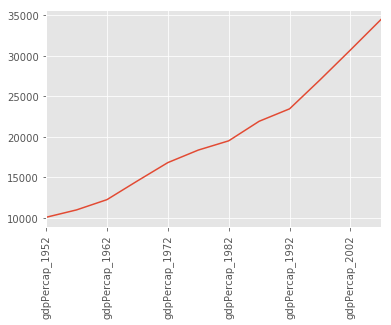

In [85]:
# this is what we had before
data.ix['Australia'].plot() 
plt.xticks(rotation=90)
data.ix['Australia']

The steps:
 1. make a for loop too
     - extract the years from the last four characters of the columns' names.
     - store these in a list using the Accumulator pattern
 3. Use this list as your x-values to input into plt.plot
 2. What do you have to do to your y-data

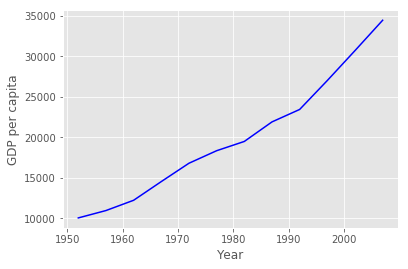

In [86]:
# Accumulator pattern to collect years (as character strings).
years = []
for col in data.columns:
    year = col[-4:]
    years.append(year)

# Australia data as list.
gdp_australia = data.ix['Australia'].tolist()

# Plot: 'b-' sets the line style.
plt.plot(years, gdp_australia, 'b-')
plt.ylabel('GDP per capita')
plt.xlabel('Year')

We also show here how to change formats in plots by use a keyward argument after the arguments x and y. This keyword sets the line color to "b" which is short for blue and "-" which is a solid line. What if you did "b--" or "b."

#### 4.2 Australia & New Zealand GDP versus Year

What do we need to do to edit this so we can also plot the New Zealand data on the same figure? Will the x-axis be any different for the countries? What is different?

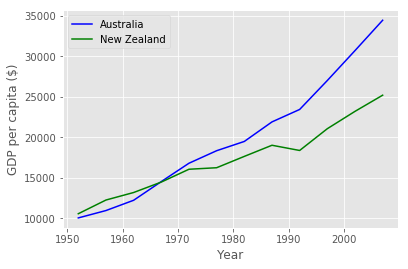

In [87]:
# Accumulator pattern to collect years (as character strings).
years = []
for col in data.columns:
    year = col[-4:]
    years.append(year)

# Select two countries' worth of data.
gdp_australia = data.ix['Australia']
gdp_nz = data.ix['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

#### 4.3 A scatter plot?
Make a scatter plot correlating the GDP of Australia and New Zealand

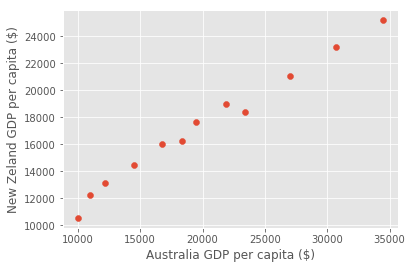

In [88]:
plt.scatter(gdp_australia, gdp_nz)
plt.xlabel('Australia GDP per capita ($)')
plt.ylabel('New Zeland GDP per capita ($)')

we could also use DataFrame.plot.scatter

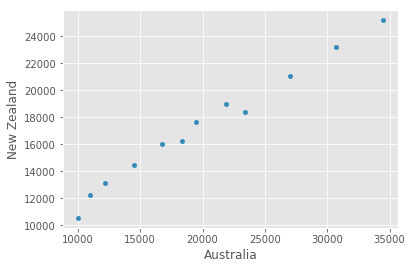

In [89]:
data.T.plot.scatter(x='Australia',y='New Zealand')

#### 4.4 Plotting Exercises

##### Problem 1

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe. Modify it again to plot the maximum GDP per capita over time for Europe.

    data_europe = pandas.read_csv('data/gapminder_gdp_europe.csv')
    data_europe.____.plot(label='min')
    data_europe.____
    plt.legend(loc='best')


In [82]:
#first there is a mistake in the first line, but we can fix it later

data_europe = pandas.read_csv('data/gapminder_gdp_europe.csv')
data_europe = data_europe.set_index('country')
data_europe

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.385170,13221.821840,13822.583940,8447.794873,9875.604515,11628.388950,14619.222720
Czech Republic,6876.140250,8256.343918,10136.867130,11399.444890,13108.453600,14800.160620,15377.228550,16310.443400,14297.021220,16048.514240,17596.210220,22833.308510
Denmark,9692.385245,11099.659350,13583.313510,15937.211230,18866.207210,20422.901500,21688.040480,25116.175810,26406.739850,29804.345670,32166.500060,35278.418740
Finland,6424.519071,7545.415386,9371.842561,10921.636260,14358.875900,15605.422830,18533.157610,21141.012230,20647.164990,23723.950200,28204.590570,33207.084400


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

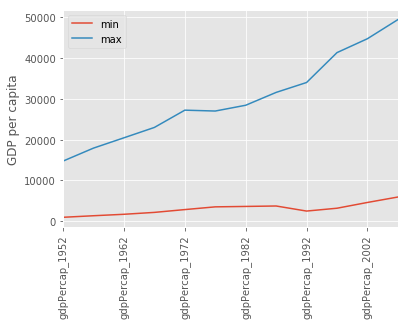

In [83]:
data_europe.T.min(axis=1).plot(label='min')
data_europe.T.max(axis=1).plot(label='max')
plt.legend(loc='best')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)

##### Problem 2

Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?

gdpPercap_1952    331.0
gdpPercap_1957    350.0
gdpPercap_1962    388.0
gdpPercap_1967    349.0
gdpPercap_1972    357.0
gdpPercap_1977    371.0
gdpPercap_1982    424.0
gdpPercap_1987    385.0
gdpPercap_1992    347.0
gdpPercap_1997    415.0
gdpPercap_2002    611.0
gdpPercap_2007    944.0
Name: min, dtype: float64
gdpPercap_1952    108382.35290
gdpPercap_1957    113523.13290
gdpPercap_1962     95458.11176
gdpPercap_1967     80894.88326
gdpPercap_1972    109347.86700
gdpPercap_1977     59265.47714
gdpPercap_1982     33693.17525
gdpPercap_1987     28118.42998
gdpPercap_1992     34932.91959
gdpPercap_1997     40300.61996
gdpPercap_2002     36023.10540
gdpPercap_2007     47306.98978
Name: max, dtype: float64


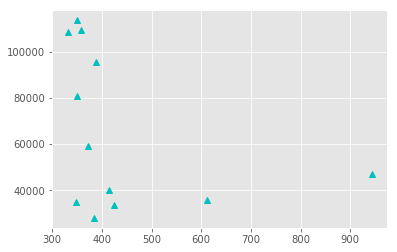

In [57]:
data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
x = data_asia.describe().ix['min',:]
y = data_asia.describe().ix['max',:]

print(x)
print(y)
plt.plot(x,y,'c^')

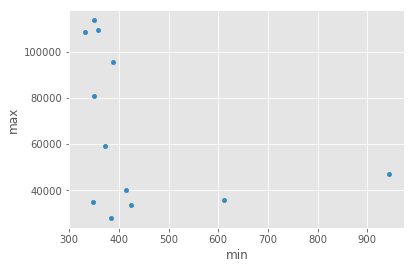

In [58]:
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

You might note that the variability in the maximum is much higher than that of the minimum. Take a look at the maximum and the max indexes:

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object
gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

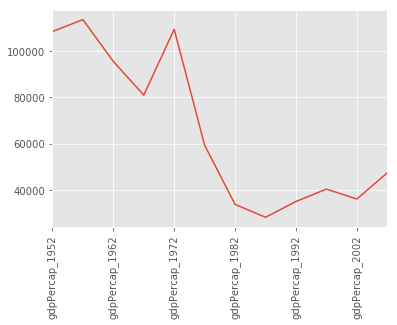

In [59]:
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())
plt.xticks(rotation=90)

In [60]:
data_asia.max()
print(data_asia.idxmax())
print(data_asia.idxmin())

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object
gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object


##### Problem 4

This short programs creates a plot showing the correlation between GDP and life expectancy for 2007, normalizing marker size by population:

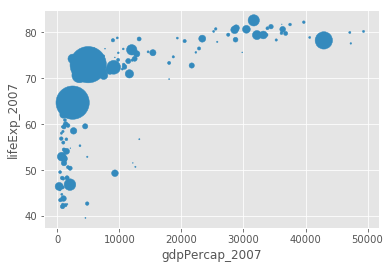

In [61]:
data_all = pandas.read_csv('data/gapminder_all.csv')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

---------------------------
### 5.0 Functions

#### Break programs down into functions to make them easier to understand.

- Human beings can only keep a few items in working memory at a time.
- Understand larger/more complicated ideas by understanding and combining pieces.
    - Components in a machine.
    - Lemmas when proving theorems.
- Functions serve the same purpose in programs.
    - *Encapsulate* complexity so that we can treat it as a single “thing”.
- Also enables re-use.
    - Write one time, use many times.

#### Define a function using def with a name, parameters, and a block of code.
- Begin the definition of a new function with def.
- Followed by the name of the function.
    - Must obey the same rules as variable names.
- Then parameters in parentheses.
    - Empty parentheses if the function doesn’t take any inputs.
    - We will discuss this in detail in a moment.
- Then a colon.
- Then an indented block of code.

In [62]:
def print_greeting():
    print('Hello!')

#### Defining a function does not run it.
- Defining a function does not run it.
    - Like assigning a value to a variable.
- Must call the function to execute the code it contains.

In [63]:
print_greeting()

Hello!


#### Arguments in call are matched to parameters in definition.
- Functions are most useful when they can operate on different data.
- Specify parameters when defining a function.
    - These become variables when the function is executed.
    - Are assigned the arguments in the call (i.e., the values passed to the function).

In [64]:
def print_date(year, month, day):
    joined = str(year) + '/' + str(month) + '/' + str(day)
    print(joined)

print_date(1871, 3, 19)

1871/3/19


Via Twitter: () contains the ingredients for the function while the body contains the recipe.

![https://twitter.com/minisciencegirl/status/693486088963272705]

#### Functions may return a result to their caller using return.
- Use return ... to give a value back to the caller.
- May occur anywhere in the function.
- But functions are easier to understand if return occurs:
    - At the start to handle special cases.
    - At the very end, with a final result.

In [65]:
def average(values):
    if len(values) == 0:
        return None
    return sum(values) / len(values)

In [66]:
a = average([1, 3, 4])
print('average of actual values:', a)

average of actual values: 2.6666666666666665


In [67]:
2.6666666666666665

2.6666666666666665

Remember: [every function returns something.](https://ntmoore.github.io/python-novice-gapminder-ntm/04-built-in/)
A function that doesn’t explicitly return a value automatically returns None.

In [68]:
result = print_date(1871, 3, 19)
print('result of call is:', result)

1871/3/19
result of call is: None


#### pRACTICE

##### problem 1
What does the following program print?

    def report(pressure):
        print('pressure is', pressure)

    print('calling', report, 22.5)

##### problem 2
The example above:

    result = print_date(1871, 3, 19)
    print('result of call is:', result)
    
printed:

    1871/3/19
    result of call is: None
    
Explain why the two lines of output appeared in the order they did.

##### problem 6

Assume that the following code has been executed:

    import pandas

    df = pandas.read_csv('gapminder_gdp_asia.csv', index_col=0)
    japan = df.ix['Japan']
    
Complete the statements below to obtain the average GDP for Japan across the years reported for the 1980s.

    year = 1983
    gdp_decade = 'gdpPercap_' + str(year // ____)
    avg = (japan.ix[gdp_decade + ___] + japan.ix[gdp_decade + ___]) / 2

Abstract the code above into a single function.
   
    def avg_gdp_in_decade(country, continent, year):
        df = pd.read_csv('gapminder_gdp_'+___+'.csv',
                          delimiter=',',index_col=0)
        ____
        ____
        ____
        return avg

How would you generalize this function if you did not know beforehand which specific years occurred as columns in the data? For instance, what if we also had data from years ending in 1 and 9 for each decade? (Hint: use the columns to filter out the ones that correspond to the decade, instead of enumerating them in the code.)


In [69]:
import pandas

df = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col=0)
japan = df.ix['Japan']

In [70]:
year = 1983
gdp_decade = 'gdpPercap_' + str(year // 10)
avg = (japan.ix[gdp_decade + '2'] + japan.ix[gdp_decade + '7']) / 2
print(avg)

20880.0238


In [71]:
def avg_gdp_in_decade(country, continent, year):
    df = pandas.read_csv('data/gapminder_gdp_' + continent + '.csv', index_col=0)
    c = df.ix[country]
    gdp_decade = 'gdpPercap_' + str(year // 10)
    avg = (c.ix[gdp_decade + '2'] + c.ix[gdp_decade + '7'])/2
    return avg

In [72]:
def avg_gdp_in_decade(country, continent, year):
    df = pandas.read_csv('data/gapminder_gdp_' + continent + '.csv', index_col=0)
    c = df.ix[country] 
    gdp_decade = 'gdpPercap_' + str(year // 10)
    total = 0.0
    num_years = 0
    for yr_header in c.index: # c's index contains reported years
        if yr_header.startswith(gdp_decade):
            total = total + c.ix[yr_header]
            num_years = num_years + 1
    return total/num_years

In [73]:
avg_gdp_in_decade('japan','asia',1983)

KeyError: 'japan'

_-----------------------------
### 6 Varial Scope

- The scope of a variable is the part of a program that can ‘see’ that variable.
- There are only so many sensible names for variables.
- People using functions shouldn’t have to worry about what variable names the author of the function used.
- People writing functions shouldn’t have to worry about what variable names the function’s caller uses.
- The part of a program in which a variable is visible is called its scope.


    pressure = 103.9

    def adjust(t):
        temperature = t * 1.43 / pressure
        return temperature
        
- pressure is a global variable.
    - Defined outside any particular function.
    - Visible everywhere.
- t and temperature are local variables in adjust.
    - Defined in the function.
    - Not visible in the main program.
    - Remember: a function parameter is a variable that is automatically assigned a value when the function is called.


    print('adjusted:', adjust(0.9))
    print('temperature after call:', temperature)

    adjusted: 0.01238691049085659

    Traceback (most recent call last):
      File "/Users/swcarpentry/foo.py", line 8, in <module>
        print('temperature after call:', temperature)
    NameError: name 'temperature' is not defined
    Local and Global Variable Use

In [74]:
pressure = 103.9

def adjust(t):
    temperature = t * 1.43 / pressure
    return temperature

In [75]:
print('adjusted:', adjust(0.9))

adjusted: 0.01238691049085659


In [76]:
print('temperature after call:', temperature)

NameError: name 'temperature' is not defined

In [77]:
temperature = 3
print('adjusted:', adjust(temperature))
print('temperature after call:', temperature)

adjusted: 0.04128970163618864
temperature after call: 3


#### practice problem 2

1. Read the code below and try to identify what the errors are without running it.
2. Run the code and read the error message. Is it a SyntaxError or an IndentationError?
3. Fix the error.
4. Repeat steps 2 and 3 until you have fixed all the errors.


    def another_function
      print("Syntax errors are annoying.")
       print("But at least python tells us about them!")
      print("So they are usually not too hard to fix.")

##### practice problem 3

Read the traceback below, and identify the following:

1. How many levels does the traceback have?
2. What is the file name where the error occurred?
3. What is the function name where the error occurred?
4. On which line number in this function did the error occurr?
5. What is the type of error?
6. What is the error message?


    ---------------------------------------------------------------------------
    KeyError                                  Traceback (most recent call last)
    <ipython-input-2-e4c4cbafeeb5> in <module>()
          1 import errors_02
    ----> 2 errors_02.print_friday_message()

    /Users/ghopper/thesis/code/errors_02.py in print_friday_message()
         13
         14 def print_friday_message():
    ---> 15     print_message("Friday")

    /Users/ghopper/thesis/code/errors_02.py in print_message(day)
          9         "sunday": "Aw, the weekend is almost over."
         10     }
    ---> 11     print(messages[day])
         12
         13

    KeyError: 'Friday'

### 7. Conditonals

Use if statements to control whether or not a block of code is executed.
An if statement (more properly called a conditional statement) controls whether some block of code is executed or not.
Structure is similar to a for statement:
First line opens with if and ends with a colon
Body containing one or more statements is indented (usually by 4 spaces)


    mass = 3.54
    if mass > 3.0:
        print(mass, 'is large')

    mass = 2.07
    if mass > 3.0:
        print (mass, 'is large')


    3.54 is large
    
Conditionals are often used inside loops.
Not much point using a conditional when we know the value (as above).
But useful when we have a collection to process.


    masses = [3.54, 2.07, 9.22, 1.86, 1.71]
    for m in masses:
        if m > 3.0:
            print(m, 'is large')
    3.54 is large
    9.22 is large
    
    
Use else to execute a block of code when an if condition is not true.
else is always attached to if.
Allows us to specify an alternative to execute when the if branch isn’t taken.


    masses = [3.54, 2.07, 9.22, 1.86, 1.71]
    for m in masses:
        if m > 3.0:
            print(m, 'is large')
        else:
            print(m, 'is small')
    3.54 is large
    2.07 is small
    9.22 is large
    1.86 is small
    1.71 is small
    
    
Use elif to specify additional tests.
May want to provide several alternative choices, each with its own test.
Use elif (short for “else if”) and a condition to specify these.
Always associated with an if.
Must come before the else (which is the “catch all”).


    masses = [3.54, 2.07, 9.22, 1.86, 1.71]
    for m in masses:
        if m > 9.0:
            print(m, 'is HUGE')
        elif m > 3.0:
            print(m, 'is large')
        else:
            print(m, 'is small')
    3.54 is large
    2.07 is small
    9.22 is HUGE
    1.86 is small
    1.71 is small
    
    
Conditions are tested once, in order.
Python steps through the branches of the conditional in order, testing each in turn.
So ordering matters.


    grade = 85
    if grade >= 70:
        print('grade is C')
    elif grade >= 80:
        print('grade is B')
    elif grade >= 90:
        print('grade is A')
    grade is C
    
    
Does not automatically go back and re-evaluate if values change.


    velocity = 10.0
    if velocity > 20.0:
        print('moving too fast')
    else:
        print('adjusting velocity')
        velocity = 50.0
    adjusting velocity


Often use conditionals in a loop to “evolve” the values of variables.


    velocity = 10.0
    for i in range(5): # execute the loop 5 times
        print(i, ':', velocity)
        if velocity > 20.0:
            print('moving too fast')
            velocity = velocity - 5.0
        else:
            print('moving too slow')
            velocity = velocity + 10.0
    print('final velocity:', velocity)
    
                                                                    
    0 : 10.0
    moving too slow
    1 : 20.0
    moving too slow
    2 : 30.0
    moving too fast
    3 : 25.0
    moving too fast
    4 : 20.0
    moving too slow
    final velocity: 30.0
    
    
Create a table showing variables’ values to trace a program’s execution.

|i	|0|	.|	1|	.|	2|	.|	3|	.|	4|	.|
|---|-|--|---|---|---|---|---|---|---|---|
|velocity|	10.0|	20.0|	.	|30.0|	.	|25.0|	.	|20.0	|.	|30.0|

The program must have a print statement outside the body of the loop to show the final value of velocity, since its value is updated by the last iteration of the loop.

Compound Relations Using and, or, and Parentheses

Often, you want some combination of things to be true. You can combine relations within a conditional using and and or. Continuing the example above, suppose you have

    mass     = [ 3.54,  2.07,  9.22,  1.86,  1.71]
    velocity = [10.00, 20.00, 30.00, 25.00, 20.00]

    i = 0
    for i in range(5):
        if mass[i] > 5 and velocity[i] > 20:
            print "Fast heavy object.  Duck!"
        elif mass[i] > 2 and mass[i] <= 5 and velocity[i] <= 20:
            print "Normal traffic"
        elif mass[i] <= 2 and velocity <= 20:
            print "Slow light object.  Ignore it"
        else:
            print "Whoa!  Something is up with the data.  Check it"
            
            
Just like with arithmetic, you can and should use parentheses whenever there is possible ambiguity. A good general rule is to always use parentheses when mixing and and or in the same condition. That is, instead of:

    if mass[i] <= 2 or mass[i] >= 5 and velocity[i] > 20:
    write one of these:

    if (mass[i] <= 2 or mass[i] >= 5) and velocity[i] > 20:
    if mass[i] <= 2 or (mass[i] >= 5 and velocity[i] > 20):
   

so it is perfectly clear to a reader (and to Python) what you really mean.

##### practice 1

What does this program print?

    pressure = 71.9
    if pressure 50.0:
        pressure = 25.0
    elif pressure <= 50.0:
        pressure = 0.0
    print(pressure)
    
###### practice 2
Fill in the blanks so that this program creates a new list containing zeroes where the original list’s values were negative and ones where the origina list’s values were positive.

    original = [-1.5, 0.2, 0.4, 0.0, -1.3, 0.4]
    result = ____
    for value in original:
        if ____:
            result.append(0)
        else:
            ____
    print(result)
    
    
    [0, 1, 1, 1, 0, 1]


In [78]:
        def calculate_life_quartile(exp):
            if exp < 58.41:
                # This observation is in the first quartile
                return 1
            elif exp >= 58.41 and exp < 67.05:
                # This observation is in the second quartile
               return 2
            elif exp >= 67.05 and exp < 71.70:
                # This observation is in the third quartile
               return 3
            elif exp >= 71.70:
                # This observation is in the fourth quartile
               return 4
            else:
                # This observation has bad data
               return None

        calculate_life_quartile(62.5)

        2

2

In [79]:
data_conditionals

NameError: name 'data_conditionals' is not defined

In [80]:
data_conditionals = pandas.read_csv('data/gapminder_all.csv')
data_conditionals['life_qrtl'] = data_conditionals['lifeExp'].apply(calculate_life_quartile)

KeyError: 'lifeExp'

### Follow standard Python style in your code.

PEP8: a style guide for Python that discusses topics such as how you should name variables, how you should use indentation in your code, how you should structure your import statements, etc. Adhering to PEP8 makes it easier for other Python developers to read and understand your code, and to understand what their contributions should look like. The PEP8 application and Python library can check your code for compliance with PEP8.

Use assertions to check for internal errors.
FIXME

Use docstrings to provide online help.
If the first thing in a function is a character string that is not assigned to a variable, Python attaches it to the function as the online help.
Called a docstring (short for “documentation string”).

    def average(values):
        "Return average of values, or None if no values are supplied."

        if len(values) == 0:
            return None
        return sum(values) / average(values)

    help(average)
    Help on function average in module __main__:

    average(values)
        Return average of values, or None if no values are supplied.
    
    
Multiline Strings

Often use multiline strings for documentation. These start and end with three quote characters (either single or double) and end with three matching characters.

    """This string spans
    multiple lines.

    Blank lines are allowed."""

----------------------

## Other things

In [ ]:
ls

In [ ]:
ls data/